In [4]:
import pandas as pd,seaborn as sns,numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
data = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [4]:
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [5]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

## Converting variables to Int

- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

<b> !! We should not make one-hot encoding because the variables are representing best or worse features

In [6]:
#Lets see the variables
print(len(data.cut.unique()),data.cut.unique())
print(len(data.color.unique()),data.color.unique())
print(len(data.clarity.unique()),data.clarity.unique())

5 ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
7 ['E' 'I' 'J' 'H' 'F' 'G' 'D']
8 ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [26]:
df = data.drop(data.columns[0],axis=1)

In [27]:
df.cut = (df.cut.replace(to_replace='Fair',value=1)
            .replace(to_replace='Good',value=2).
              replace(to_replace='Very Good',value=3).
              replace(to_replace='Premium',value=4).
              replace(to_replace='Ideal',value=5)
           )

df.color = (df.color.replace(to_replace='J',value=1)
            .replace(to_replace='I',value=2).
              replace(to_replace='H',value=3).
              replace(to_replace='G',value=4).
              replace(to_replace='F',value=5).
            replace(to_replace='E',value=6).
            replace(to_replace='D',value=7)
           )

df.clarity = (df.clarity.replace(to_replace='I1',value=1)
            .replace(to_replace='SI2',value=2).
              replace(to_replace='SI1',value=3).
              replace(to_replace='VS2',value=4).
              replace(to_replace='VS1',value=5).
            replace(to_replace='VVS2',value=6).
            replace(to_replace='VVS1',value=7).
              replace(to_replace='IF',value=8)
           )

In [28]:
df

carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2       0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3       0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4       0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    5      7        3   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    2      7        3   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    3      7        3   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    4      3        2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    5      7        2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [30]:
df = df.astype(float)

In [31]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

# Feature Engineering

In [32]:
df.corr()

carat       cut     color   clarity     depth     table     price  \
carat    1.000000 -0.134967 -0.291437 -0.352841  0.028224  0.181618  0.921591   
cut     -0.134967  1.000000  0.020519  0.189175 -0.218055 -0.433405 -0.053491   
color   -0.291437  0.020519  1.000000 -0.025631 -0.047279 -0.026465 -0.172511   
clarity -0.352841  0.189175 -0.025631  1.000000 -0.067384 -0.160327 -0.146800   
depth    0.028224 -0.218055 -0.047279 -0.067384  1.000000 -0.295779 -0.010647   
table    0.181618 -0.433405 -0.026465 -0.160327 -0.295779  1.000000  0.127134   
price    0.921591 -0.053491 -0.172511 -0.146800 -0.010647  0.127134  1.000000   
x        0.975094 -0.125565 -0.270287 -0.371999 -0.025289  0.195344  0.884435   
y        0.951722 -0.121462 -0.263584 -0.358420 -0.029341  0.183760  0.865421   
z        0.953387 -0.149323 -0.268227 -0.366952  0.094924  0.150929  0.861249   

                x         y         z  
carat    0.975094  0.951722  0.953387  
cut     -0.125565 -0.121462 -0.149323  
color   -0.270287 -0.263584 -0.268227  
clarity -0.371999 -0.358420 -0.366952  
depth   -0.025289 -0.029341  0.094924  
table    0.195344  0.183760  0.150929  
price    0.884435  0.865421  0.861249  
x        1.000000  0.974701  0.970772  
y        0.974701  1.000000  0.952006  
z        0.970772  0.952006  1.000000

In [33]:
df.corr()[df.corr()>0.7]

carat  cut  color  clarity  depth  table     price         x  \
carat    1.000000  NaN    NaN      NaN    NaN    NaN  0.921591  0.975094   
cut           NaN  1.0    NaN      NaN    NaN    NaN       NaN       NaN   
color         NaN  NaN    1.0      NaN    NaN    NaN       NaN       NaN   
clarity       NaN  NaN    NaN      1.0    NaN    NaN       NaN       NaN   
depth         NaN  NaN    NaN      NaN    1.0    NaN       NaN       NaN   
table         NaN  NaN    NaN      NaN    NaN    1.0       NaN       NaN   
price    0.921591  NaN    NaN      NaN    NaN    NaN  1.000000  0.884435   
x        0.975094  NaN    NaN      NaN    NaN    NaN  0.884435  1.000000   
y        0.951722  NaN    NaN      NaN    NaN    NaN  0.865421  0.974701   
z        0.953387  NaN    NaN      NaN    NaN    NaN  0.861249  0.970772   

                y         z  
carat    0.951722  0.953387  
cut           NaN       NaN  
color         NaN       NaN  
clarity       NaN       NaN  
depth         NaN       NaN  
table         NaN       NaN  
price    0.865421  0.861249  
x        0.974701  0.970772  
y        1.000000  0.952006  
z        0.952006  1.000000

<AxesSubplot: xlabel='x', ylabel='carat'>

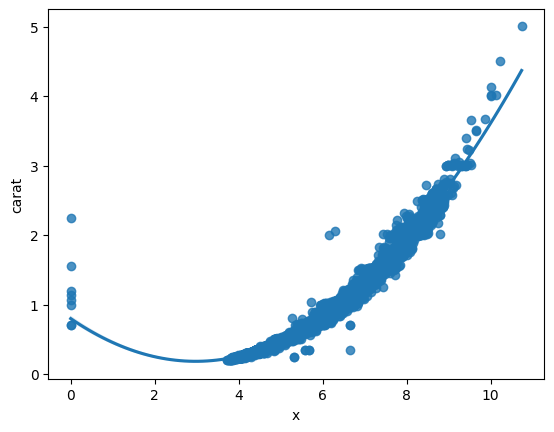

In [16]:
sns.regplot(data=df,x="x",y="carat",order=2)

<AxesSubplot: xlabel='y', ylabel='carat'>

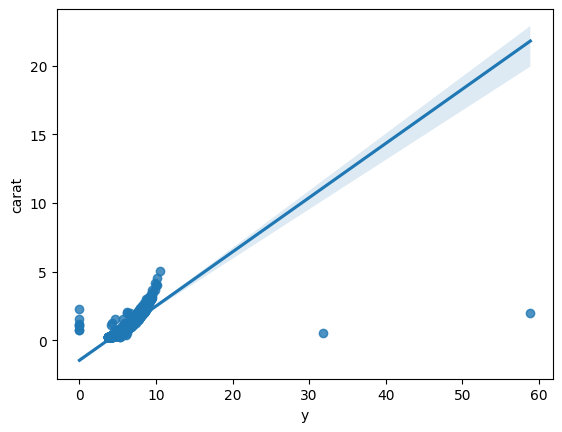

In [19]:
sns.regplot(data=df,x="y",y="carat",order=1)

There are so big colleration between x,y,z and carat variables I will keep just carat from them.

In [34]:
df.drop(['x','y','z'],axis=1,inplace=True)

# Variable Creation

In [36]:
X = df.drop('price',axis=1)
y = df.price

In [39]:
#scale it
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Model Creation

In [49]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

In [50]:
#model creating
models = dict(
    lr_model = LinearRegression(),
    lasso_model = Lasso(alpha=1),
    ridge_model = Ridge(alpha=1),
    cb_model = CatBoostRegressor(),
    bagging_model = BaggingRegressor(),
    rf_model = RandomForestRegressor()
)

In [51]:
#fitting models
for k,v in models.items():
    v.fit(x_train,y_train)

Learning rate set to 0.072669
0:	learn: 3745.0030689	total: 6.33ms	remaining: 6.33s
1:	learn: 3506.4164197	total: 11.5ms	remaining: 5.74s
2:	learn: 3286.4067657	total: 15.8ms	remaining: 5.25s
3:	learn: 3077.8302720	total: 20.4ms	remaining: 5.09s
4:	learn: 2890.5540460	total: 25.2ms	remaining: 5.01s
5:	learn: 2718.5716386	total: 29.6ms	remaining: 4.91s
6:	learn: 2556.4105735	total: 34ms	remaining: 4.83s
7:	learn: 2406.3090544	total: 38.6ms	remaining: 4.78s
8:	learn: 2265.2007941	total: 43.7ms	remaining: 4.81s
9:	learn: 2141.9048663	total: 48.8ms	remaining: 4.83s
10:	learn: 2025.0158211	total: 53.8ms	remaining: 4.84s
11:	learn: 1914.1313013	total: 58.4ms	remaining: 4.81s
12:	learn: 1810.8790934	total: 63.2ms	remaining: 4.8s
13:	learn: 1718.7299666	total: 67.9ms	remaining: 4.78s
14:	learn: 1632.8258585	total: 73.9ms	remaining: 4.85s
15:	learn: 1550.5899323	total: 78.5ms	remaining: 4.83s
16:	learn: 1477.5862671	total: 83ms	remaining: 4.8s
17:	learn: 1409.7191485	total: 87.6ms	remaining: 4.

In [72]:
# See models scores

for k,v in models.items():
    print("{} has score => {}".format(k,v.score(x_test,y_test)))
    print("{} has RMSE => {}".format(k,np.sqrt(mean_squared_error(v.predict(x_test),y_test))))
    print("-------")

lr_model has score => 0.9045583680183735
lr_model has RMSE => 1220.0427021671264
-------
lasso_model has score => 0.9044283022473977
lasso_model has RMSE => 1220.8737429027597
-------
ridge_model has score => 0.9045580136630934
ridge_model has RMSE => 1220.0449670496685
-------
cb_model has score => 0.9825413360238953
cb_model has RMSE => 521.8090490134524
-------
bagging_model has score => 0.9791173647362119
bagging_model has RMSE => 570.6880184218176
-------
rf_model has score => 0.980600597694855
rf_model has RMSE => 550.0476047556515
-------


# Model Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [55]:
cb_test_params = {
    "iterations":[200,300,500],
    "learning_rate":[0.01,0.05,0.1,0.001],
    "depth":[3,5,8,9]
    }
rf_test_params = {
    "max_depth":[2,5,8,10],
    "max_features":[2,3,5,8],
    "min_samples_split":[2,5,7,10],
    "n_estimators":[10,200,500,1000]
    }  
bagging_test_params = {
    "n_estimators":range(0,20)
}

### CatBoost Tuning

In [56]:
cb_CV =  GridSearchCV(models["cb_model"],cb_test_params,cv=10,n_jobs=-1)
cb_CV.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0:	learn: 3973.4939832	total: 71.2ms	remaining: 14.2s
1:	learn: 3940.9325577	total: 78.3ms	remaining: 7.75s
2:	learn: 3908.8842320	total: 85.3ms	remaining: 5.6s
3:	learn: 3877.2130790	total: 90.6ms	remaining: 4.44s
4:	learn: 3846.0065342	total: 93.8ms	remaining: 3.66s
5:	learn: 3815.3625023	total: 97.1ms	remaining: 3.14s
6:	learn: 3784.7637424	total: 99.8ms	remaining: 2.75s
7:	learn: 3754.3873984	total: 102ms	remaining: 2.46s
8:	learn: 3724.5668824	total: 105ms	remaining: 2.23s
9:	learn: 3694.8605304	total: 108ms	remaining: 2.06s
10:	learn: 3665.5178147	total: 111ms	remaining: 1.91s
11:	learn: 3636.3269611	total: 127ms	remaining: 1.99s
12:	learn: 3607.6294004	total: 148ms	remaining: 2.13s
13:	learn: 3579.3401907	total: 168ms	remaining: 2.23s
14:	learn: 3551.2901100	total: 188ms	remaining: 2.32s
15:	learn: 3523.5475942	total: 209ms	remaining: 2.41s
16:	learn: 3496.1503141	total: 227ms	remaining: 2.44s
17:	learn: 3469.1150050	total: 251ms	remaining: 2.54s
18:	learn: 3442.5745630	total: 2

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x792a944187f0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8, 9], 'iterations': [200, 300, 500],
                         'learning_rate': [0.01, 0.05, 0.1, 0.001]})

In [58]:
cb_CV.best_params_

{'depth': 8, 'iterations': 500, 'learning_rate': 0.1}

In [59]:
cb_tuned_model = CatBoostRegressor(**cb_CV.best_params_).fit(x_train,y_train)

0:	learn: 3648.1451659	total: 8.36ms	remaining: 4.17s
1:	learn: 3327.1869511	total: 14.9ms	remaining: 3.71s
2:	learn: 3036.9628036	total: 22.2ms	remaining: 3.67s
3:	learn: 2773.0019444	total: 28.7ms	remaining: 3.56s
4:	learn: 2530.0202825	total: 35.1ms	remaining: 3.48s
5:	learn: 2313.2981633	total: 41ms	remaining: 3.38s
6:	learn: 2126.7536653	total: 47.2ms	remaining: 3.33s
7:	learn: 1955.7727460	total: 53.3ms	remaining: 3.28s
8:	learn: 1806.3497377	total: 59.6ms	remaining: 3.25s
9:	learn: 1671.5146666	total: 65.6ms	remaining: 3.21s
10:	learn: 1547.2753454	total: 71.7ms	remaining: 3.19s
11:	learn: 1434.6602993	total: 77.7ms	remaining: 3.16s
12:	learn: 1333.3787810	total: 84.9ms	remaining: 3.18s
13:	learn: 1249.1395639	total: 91.8ms	remaining: 3.19s
14:	learn: 1172.8585067	total: 98.4ms	remaining: 3.18s
15:	learn: 1105.4665840	total: 105ms	remaining: 3.19s
16:	learn: 1045.5970950	total: 113ms	remaining: 3.21s
17:	learn: 990.7203974	total: 120ms	remaining: 3.21s
18:	learn: 943.7835404	tot

In [66]:
from sklearn.metrics import mean_squared_error
print(cb_tuned_model.score(x_test,y_test))
print(np.sqrt(mean_squared_error(cb_tuned_model.predict(x_test),y_test)))

0.9826837419932095
519.676558402522


## Bagging Tuning

In [61]:
bagging_CV =  GridSearchCV(models["bagging_model"],bagging_test_params,cv=10,n_jobs=-1)
bagging_CV.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py", line 326, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/uti

GridSearchCV(cv=10, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'n_estimators': range(0, 20)})

In [62]:
bagging_CV.best_params_

{'n_estimators': 19}

In [63]:
bagging_tuned_model = BaggingRegressor(n_estimators=19).fit(x_train,y_train)

In [73]:
print(cb_tuned_model.score(x_test,y_test))
print(np.sqrt(mean_squared_error(cb_tuned_model.predict(x_test),y_test)))

0.9826837419932095
519.676558402522


# Result

- Score: 0.9826837419932095
- RMSE : 519

The best model is <b>CatBoost</b>